In [1]:
import vis_lc_extraction
import glob
import matplotlib.pyplot as plt
import importlib
from astropy.time import Time
import numpy as np
importlib.reload(vis_lc_extraction)

<module 'vis_lc_extraction' from '/opt/devel/idavis/scripts/vis_lc_extraction.py'>

## Get list of FITS images to be used in source identification

In [2]:
dir_head = '/lustre/celery/snap.I.image.fits/'
dir_freqs = glob.glob(f"{dir_head}/*")
dir_freqs.sort()
dir_hours = []
for freq in dir_freqs:
    fns = glob.glob(f"{freq}/2024-05-24/*")
    fns.sort()
    dir_hours.append(fns)
    
fns = glob.glob(f"{dir_hours[-1][0]}/*")
fns.sort()

## Initialize an instance of the lightcurve_extraction class

If images are already the right size, then you can go ahead and assign the crop_fns and crop_path properties with that information, but you will also need to update the times property, either by assigning it manually or by running the `lc_ext.get_timestamps()` function



In [3]:
fns_crop = glob.glob('/lustre/idavis/2024_05_24_ek_dra/subframe_fits/07_46/*fits')
fns_crop.sort()

lc_ext = vis_lc_extraction.lightcurve_extraction('ek dra', fns_crop, '/lustre/idavis/2024_05_24_ek_dra/', obs_time=Time('2024-04-10T00:00:00'))

print(fns_crop[0])
print(fns_crop[-1])

lc_ext.crop_fns = fns_crop
lc_ext.crop_path = '/lustre/idavis/2024_05_24_ek_dra/cropped_frames/'


/lustre/idavis/2024_05_24_ek_dra/subframe_fits/07_46/2024-05-24T07:00:01.snap.I.image_cropped.fits
/lustre/idavis/2024_05_24_ek_dra/subframe_fits/07_46/2024-05-24T07:59:52.snap.I.image_cropped.fits


/opt/devel/idavis/scripts/vis_lc_extraction.py:319: UserWarning: Unable to determine distance of object ek dra
  warnings.warn('Unable to determine distance of object '+objID)


## Get the sources and find which sources are actually associated with each other in each frame

If you haven't identified the beam shape parameters first (e.g. if the data were not deconvolved) then you need to run `lc_ext.get_beam_shape_params()` first

In [4]:
lc_ext.get_source_positions()
lc_ext.find_associated_sources()
lc_ext.find_persistent_sources()

### `source_positions` comes from `get_source_positions`
This is a list of sources found in each frame:

In [5]:
lc_ext.source_positions[0] # sources found in frame 0:

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    [(222.82396184, 61.56219854), (217.0881837 , 63.55376231),
     (224.87434128, 64.07810853), (220.98419008, 64.58736736),
     (223.52557786, 65.4295585 ), (215.29275141, 67.08655724)]>

### `source_dict` and `frame_source_dict` comes from `find_associated_sources`
`source_dict` is the final list of "official", labelled sources, their average position, and their position in each frame they're detected. `frame_source_dict` is a dictionary of the "official" sources in each frame and what their positions were in that frame


In [7]:
print(lc_ext.source_dict['source_00'][0:5]) # only listing the first five positions for source_00 here
print(f"\n Mean position of source_00:{lc_ext.source_dict['source_00_mean_pos']}\n")
print(f"All 'official' sources found in frame 0: {lc_ext.frame_source_dict['frame_000']}")

[<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (222.82396184, 61.56219854)>, <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (222.61344372, 61.53918646)>, <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (222.87346253, 61.43255235)>, <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (222.72525537, 61.63619081)>, <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (222.65280896, 61.63572852)>]

 Mean position of source_00:<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (222.71038352, 61.58859216)>

All 'official' sources found in frame 0: {'sources': ['source_00', 'source_01', 'source_02', 'source_03', 'source_04', 'source_05'], 'positions': [<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (222.82396184, 61.56219854)>, <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (217.0881837, 63.55376231)>, <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (224.87434128, 64.07810853)>, <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (220.984190

## Finds the separation and position angle between a source's position in a given frame and its average position
You need to run this to estimate how the position of the star/coordinate of interest changes

In [8]:
lc_ext.find_separation_and_pos_angs()

## Estimates the change in position of the star/ coordinate of interest based on weighted changes of the surrounding sources that were regularly detected

In [9]:
lc_ext.get_star_positions()

/opt/devel/idavis/scripts/vis_lc_extraction.py:961: UserWarning: No sources found in the field to estimate position offset for frame frame_017
  warnings.warn(f"No sources found in the field to estimate position offset for frame {frame_key}")
/opt/devel/idavis/scripts/vis_lc_extraction.py:961: UserWarning: No sources found in the field to estimate position offset for frame frame_018
  warnings.warn(f"No sources found in the field to estimate position offset for frame {frame_key}")
/opt/devel/idavis/scripts/vis_lc_extraction.py:961: UserWarning: No sources found in the field to estimate position offset for frame frame_027
  warnings.warn(f"No sources found in the field to estimate position offset for frame {frame_key}")
/opt/devel/idavis/scripts/vis_lc_extraction.py:961: UserWarning: No sources found in the field to estimate position offset for frame frame_032
  warnings.warn(f"No sources found in the field to estimate position offset for frame {frame_key}")
/opt/devel/idavis/scripts/vi

## Get the fluxes for the persistently-detected sources and for the position of the star/coordinate

In [14]:
source_fluxes = lc_ext.get_all_source_fluxes()
lc_ext.get_star_fluxes()

Text(0.5, 1.0, 'Flux from location of EK Dra')

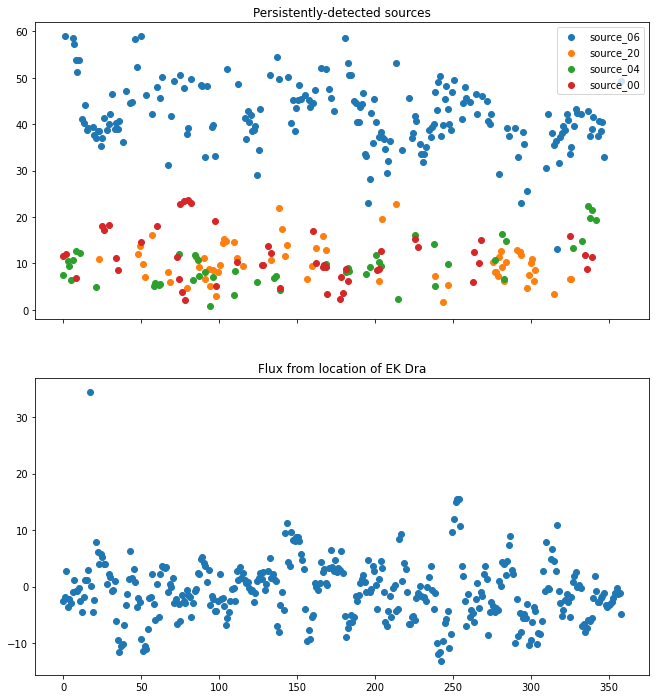

In [23]:
fig, axs = plt.subplots(2,1, sharex = True)
fig.set_figheight(12)
fig.set_figwidth(11)
for i,f in enumerate(source_fluxes.transpose()):
    axs[0].scatter(np.linspace(0,len(f),len(f)),f, label = list(lc_ext.persistent_sources.keys())[i])
axs[0].legend()
axs[1].scatter(np.linspace(0,len(f),len(f)), lc_ext.star_fluxes)

axs[0].set_title("Persistently-detected sources")
axs[1].set_title("Flux from location of EK Dra")

## Can save and load in `lightcurve_extraction` objects 

In [24]:
lc_ext.save_data("/lustre/idavis/2024_05_24_ek_dra/test_saved_light_curve_extraction.npz")

In [30]:
lc_ext_reload = vis_lc_extraction.load_data("/lustre/idavis/2024_05_24_ek_dra/test_saved_light_curve_extraction.npz")

In [31]:
lc_ext_reload.frame_source_dict['frame_000']

{'sources': ['source_00',
  'source_01',
  'source_02',
  'source_03',
  'source_04',
  'source_05'],
 'positions': [<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
      (222.82396184, 61.56219854)>,
  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
      (217.0881837, 63.55376231)>,
  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
      (224.87434128, 64.07810853)>,
  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
      (220.98419008, 64.58736736)>,
  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
      (223.52557786, 65.4295585)>,
  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
      (215.29275141, 67.08655724)>],
 'separations': [0.06016214597147139,
  None,
  None,
  None,
  0.13562265615855565,
  None],
 'pos_angles': [2.024085017496578, None, None, None, 5.577653274381203, None]}